In [2]:
import urllib3
#for https certificates
import certifi
from dotenv import load_dotenv
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
load_dotenv()
stravaAuthorization = os.environ['stravaAuth']
#Get request to strava API
http = urllib3.PoolManager(
    cert_reqs="CERT_REQUIRED",
    ca_certs=certifi.where()
)
response = http.request(
    "GET",
    "https://www.strava.com/api/v3/athlete/activities",
    headers={
        'Authorization': 'Bearer ' + stravaAuthorization
    },
    timeout = 4,
    retries = 4
)
myData = json.loads(response.data)

In [4]:
print(myData)

[{'resource_state': 2, 'athlete': {'id': 119427941, 'resource_state': 1}, 'name': 'Kitt sprint and zone 2 part of flagstaff ', 'distance': 21348.7, 'moving_time': 4224, 'elapsed_time': 4301, 'total_elevation_gain': 494.0, 'type': 'Ride', 'sport_type': 'Ride', 'workout_type': 10, 'id': 9555896680, 'start_date': '2023-07-31T12:52:56Z', 'start_date_local': '2023-07-31T06:52:56Z', 'timezone': '(GMT-07:00) America/Denver', 'utc_offset': -21600.0, 'location_city': None, 'location_state': None, 'location_country': 'United States', 'achievement_count': 4, 'kudos_count': 0, 'comment_count': 0, 'athlete_count': 1, 'photo_count': 0, 'map': {'id': 'a9555896680', 'summary_polyline': 'uffsFxcpaSfD_@zAe@bHGp@JjAvAZAHuAEsANu@XObCATSPaOJ]r@q@JkBPu@tAuAb@kBfEO?_NNu@t@k@p@Cl@Lz@t@x@HXIfAoA~AF~@e@xA?dAd@zAm@Na@C_EcBwFMqAVoBjA{@tCMdAPfAbAd@bBPDGe@s@{AiAs@aCUqB\\m@l@Uf@Kl@AfAXzAnArDFbLFTxCBpFiC~AeBDi@YcB`@BXt@lAz@RfBHbL?~dCLhAx@hDT|BjApD?l@ST}@DeD}@_ABcAt@s@jAmDrAaClDyANuBk@aA?k@bAU`BYX{@]yBCSgA]Uc@XQdAcCzB

In [17]:
data_dict = dict()
for i in range(len(myData)):
    if myData[i]['device_watts'] == True:
        if myData[i]['id'] not in data_dict.keys():
            data_dict[myData[i]['id']] = {'Date' : myData[i]['start_date'], 'Average Watts' : myData[i]['average_watts'], 'Maximum Watts' : myData[i]['max_watts']}
        else:
            print("err")
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df.iloc[::-1]
print(df)

                            Date  Average Watts  Maximum Watts
9425224562  2023-07-10T13:30:36Z          135.5            601
9437726890  2023-07-12T14:07:29Z          155.4            586
9444220719  2023-07-13T14:08:49Z          142.7            655
9476242785  2023-07-18T16:43:42Z          137.4            665
9488528380  2023-07-20T14:16:20Z          158.1            720
9494209858  2023-07-21T13:02:27Z          149.8            836
9512850430  2023-07-24T14:25:01Z          151.0            613
9532188166  2023-07-27T15:12:43Z          131.9            466
9544994907  2023-07-29T15:33:52Z          154.2            817
9555896680  2023-07-31T12:52:56Z          130.3            867


Text(0, 0.5, 'Watts')

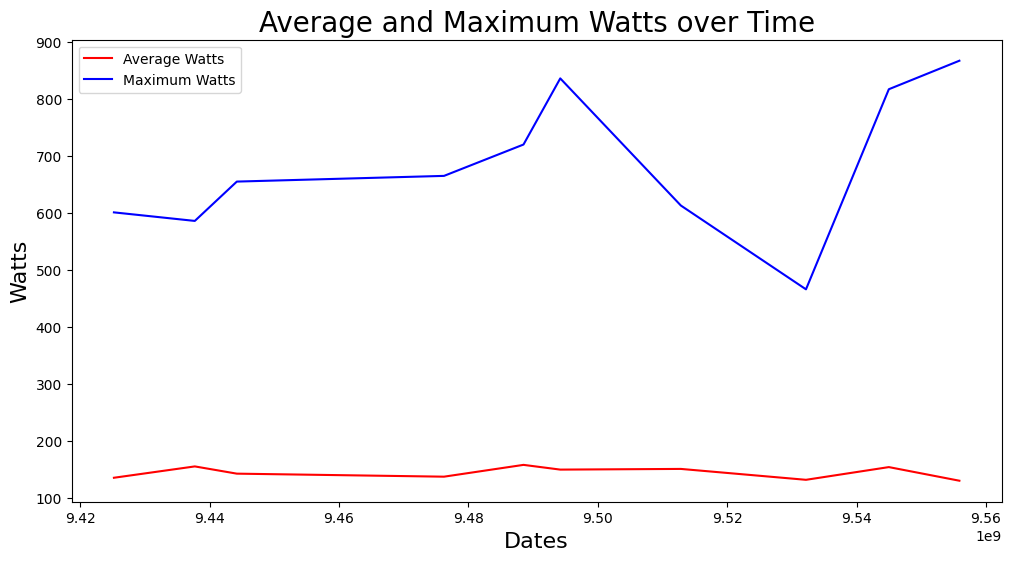

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['Average Watts'], color='red', label='Average Watts')
ax.plot(df['Maximum Watts'], color='blue', label='Maximum Watts')
ax.legend()
ax.set_title("Average and Maximum Watts over Time", fontsize=20)
ax.set_xlabel("Dates", fontsize=16)
ax.set_ylabel("Watts", fontsize=16)
# plt.xlim(df.iloc[0], df.iloc[-1])
